# Classification of synthetic time series data - Autocorrelation Time Analysis
Following on from simulating data using SSA with varying autocorrelation time ratios, we aim to classify the time series generated with ML algorithms and analyze how autocorrelation time differences affect classification difficulty.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from tqdm import tqdm
from statsmodels.nonparametric.smoothers_lowess import lowess

# Import all the functions from the 'src' directory
from stats.report import *
from visualisation.plots import *
from stats.autocorrelation import *
from utils.steady_state import save_steady_state
from simulation.simulate_telegraph_model import simulate_two_telegraph_model_systems

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in the IY007 autocorrelation time data

In [16]:
# Read in accuracy data from autocorrelation time ratio experiment
df_IY007 = pd.read_csv("/home/ianyang/stochastic_simulations/experiments/EXP-25-IY007/data_t_ac/IY007_varying_t_ac.csv")
grouped_by_ratio = df_IY007.groupby("T_ac Ratio")
t_ac_ratios_recorded = grouped_by_ratio.size().index.to_numpy()

def extract_mean_std(metric_name):
    stats = grouped_by_ratio[metric_name].agg(['mean', 'std'])
    return stats['mean'], stats['std'].fillna(0.0)

linear_svm_accuracy, linear_svm_std = extract_mean_std("SVM (linear) Accuracy")
rbf_svm_accuracy, rbf_svm_std = extract_mean_std("SVM (rbf) Accuracy")
rf_accuracy, rf_std = extract_mean_std("Random Forest Accuracy")
log_reg_accuracy, log_reg_std = extract_mean_std("Logistic Regression Accuracy")
mlp_accuracy, mlp_std = extract_mean_std("MLP Accuracy")
random_accuracy, random_std = extract_mean_std("Random Classifier Accuracy")
lstm_accuracy, lstm_std = extract_mean_std("Vanilla LSTM Accuracy")
iy001a_accuracy, iy001a_std = extract_mean_std("IY001A Accuracy")
vanilla_transformer_accuracy, vanilla_transformer_std = extract_mean_std("Vanilla Transformer Accuracy")
full_transformer_accuracy, full_transformer_std = extract_mean_std("Full Transformer Accuracy")
iy006c_accuracy, iy006c_std = extract_mean_std("IY006C-Transformer Accuracy")


## Plot everything

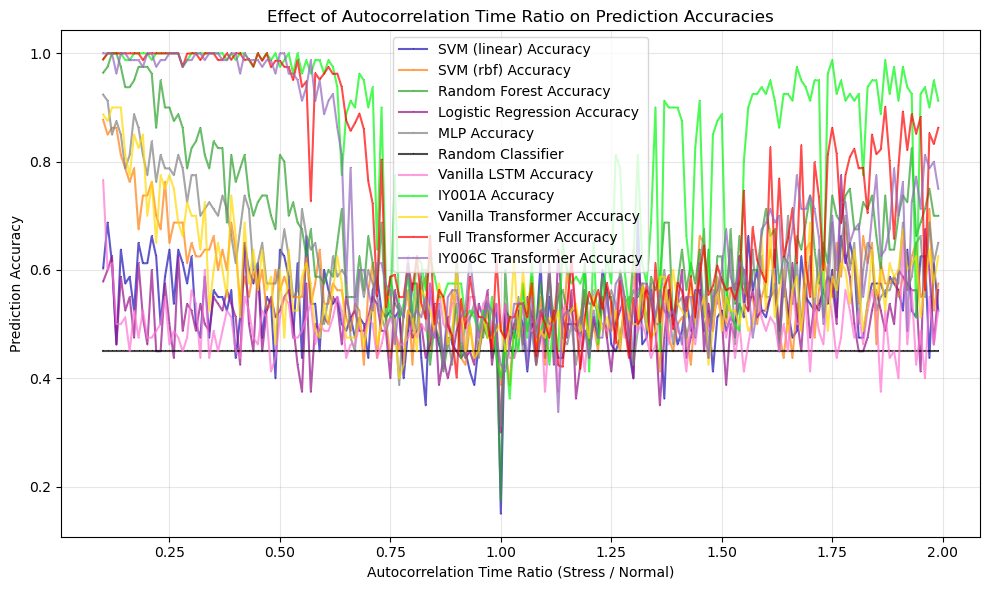

In [17]:
# Define a better color palette for improved visibility
colors = {
    'linear_svm': "#1E13B6",      
    'rbf_svm': '#ff7f0e',          # Orange
    'random_forest': '#2ca02c',    # Green
    'logistic_reg': "#96118ba3",    # Pink
    'mlp': 'gray',              #   Gray
    'random': 'Black',           # Black
    'lstm': "#ff74d5",             # Pink
    'iy001a': "#02f80f",           # Yellow-green
    'iy002a': '#17becf',           # Cyan
    'vanilla_transformer': "#ffd901", # Yellow
    'full_transformer': "#ff0000",  # Red
    'iy006c': '#9467bd'            # Purple
}

# Plot the raw data with improved colors
plt.figure(figsize=(10, 6))
# Plot T_ac Ratio vs Classifier Accuracies
plt.plot(t_ac_ratios_recorded, linear_svm_accuracy, marker=',', linestyle='-', color=colors['linear_svm'], label="SVM (linear) Accuracy", alpha=0.7)
plt.plot(t_ac_ratios_recorded, rbf_svm_accuracy, marker=',', linestyle='-', color=colors['rbf_svm'], label="SVM (rbf) Accuracy", alpha=0.7)
plt.plot(t_ac_ratios_recorded, rf_accuracy, marker=',', linestyle='-', color=colors['random_forest'], label="Random Forest Accuracy", alpha=0.7)
plt.plot(t_ac_ratios_recorded, log_reg_accuracy, marker=',', linestyle='-', color=colors['logistic_reg'], label="Logistic Regression Accuracy", alpha=0.7)
plt.plot(t_ac_ratios_recorded, mlp_accuracy, marker=',', linestyle='-', color=colors['mlp'], label="MLP Accuracy", alpha=0.7)
plt.plot(t_ac_ratios_recorded, random_accuracy, marker=',', linestyle='-', color=colors['random'], label="Random Classifier", alpha=0.7)
plt.plot(t_ac_ratios_recorded, lstm_accuracy, marker=',', linestyle='-', color=colors['lstm'], label="Vanilla LSTM Accuracy", alpha=0.7)
plt.plot(t_ac_ratios_recorded, iy001a_accuracy, marker=',', linestyle='-', color=colors['iy001a'], label="IY001A Accuracy", alpha=0.7)
plt.plot(t_ac_ratios_recorded, vanilla_transformer_accuracy, marker=',', linestyle='-', color=colors['vanilla_transformer'], label="Vanilla Transformer Accuracy", alpha=0.7)
plt.plot(t_ac_ratios_recorded, full_transformer_accuracy, marker=',', linestyle='-', color=colors['full_transformer'], label="Full Transformer Accuracy", alpha=0.7)
plt.plot(t_ac_ratios_recorded, iy006c_accuracy, marker=',', linestyle='-', color=colors['iy006c'], label="IY006C Transformer Accuracy", alpha=0.7)

plt.xlabel("Autocorrelation Time Ratio (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of Autocorrelation Time Ratio on Prediction Accuracies")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/t_ac_ratio_vs_accuracy_better_colors.png", bbox_inches='tight')
plt.show()


In [18]:
# Apply LOESS smoothing to the data
linear_svm_loess = lowess(linear_svm_accuracy.values, t_ac_ratios_recorded, frac=0.2)
rbf_svm_loess = lowess(rbf_svm_accuracy.values, t_ac_ratios_recorded, frac=0.2)
rf_loess = lowess(rf_accuracy.values, t_ac_ratios_recorded, frac=0.2)
log_reg_loess = lowess(log_reg_accuracy.values, t_ac_ratios_recorded, frac=0.2)
mlp_loess = lowess(mlp_accuracy.values, t_ac_ratios_recorded, frac=0.2)
random_loess = lowess(random_accuracy.values, t_ac_ratios_recorded, frac=0.2)
lstm_loess = lowess(lstm_accuracy.values, t_ac_ratios_recorded, frac=0.2)
iy001a_loess = lowess(iy001a_accuracy.values, t_ac_ratios_recorded, frac=0.2)
vanilla_transformer_loess = lowess(vanilla_transformer_accuracy.values, t_ac_ratios_recorded, frac=0.2)
full_transformer_loess = lowess(full_transformer_accuracy.values, t_ac_ratios_recorded, frac=0.2)
iy006c_loess = lowess(iy006c_accuracy.values, t_ac_ratios_recorded, frac=0.2)


Select a Handful for visualisation

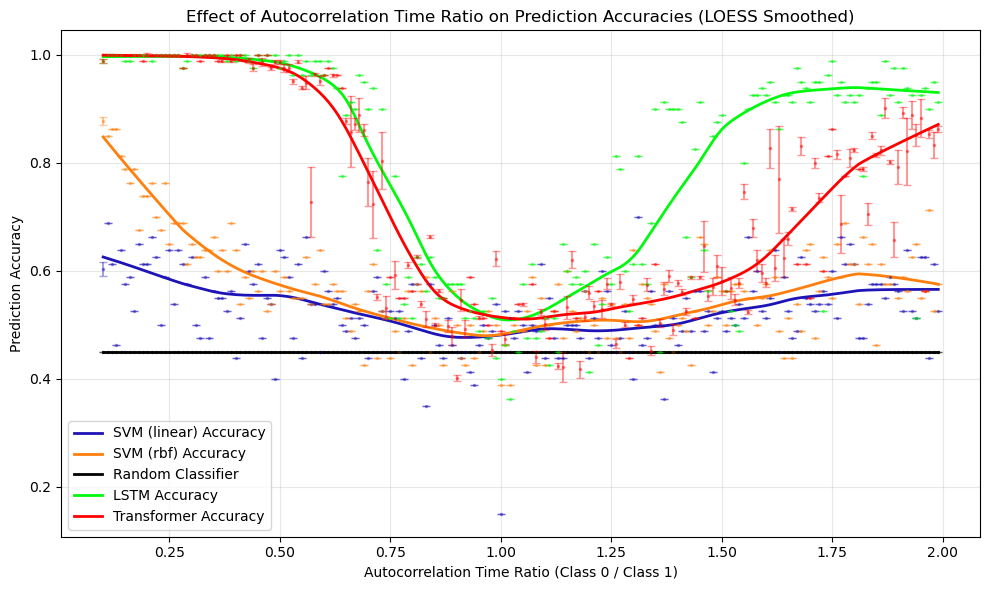

In [24]:
# Plot the LOESS smoothed data with improved colors
plt.figure(figsize=(10, 6))
plt.errorbar(t_ac_ratios_recorded, linear_svm_accuracy.values, yerr=linear_svm_std.values, fmt='.', markersize=3, color=colors['linear_svm'], alpha=0.4, capsize=3)
plt.plot(linear_svm_loess[:, 0], linear_svm_loess[:, 1], linestyle='-', color=colors['linear_svm'], linewidth=2, label="SVM (linear) Accuracy")

plt.errorbar(t_ac_ratios_recorded, rbf_svm_accuracy.values, yerr=rbf_svm_std.values, fmt='.', markersize=3, color=colors['rbf_svm'], alpha=0.4, capsize=3)
plt.plot(rbf_svm_loess[:, 0], rbf_svm_loess[:, 1], linestyle='-', color=colors['rbf_svm'], linewidth=2, label="SVM (rbf) Accuracy")
# plt.plot(rf_loess[:, 0], rf_loess[:, 1], linestyle='-', color=colors['random_forest'], linewidth=2, label="Random Forest Accuracy")
# plt.plot(log_reg_loess[:, 0], log_reg_loess[:, 1], linestyle='-', color=colors['logistic_reg'], linewidth=2, label="Logistic Regression Accuracy")
# plt.plot(mlp_loess[:, 0], mlp_loess[:, 1], linestyle='-', color=colors['mlp'], linewidth=2, label="MLP Accuracy")

plt.errorbar(t_ac_ratios_recorded, random_accuracy.values, yerr=random_std.values, fmt='.', markersize=3, color=colors['random'], alpha=0.4, capsize=3)
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")
# plt.plot(lstm_loess[:, 0], lstm_loess[:, 1], linestyle='-', color=colors['lstm'], linewidth=2, label="Vanilla LSTM Accuracy")

plt.errorbar(t_ac_ratios_recorded, iy001a_accuracy.values, yerr=iy001a_std.values, fmt='.', markersize=3, color=colors['iy001a'], alpha=0.4, capsize=3)
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="LSTM Accuracy")
# Uncomment if you have iy002a_loess
# plt.plot(iy002a_loess[:, 0], iy002a_loess[:, 1], linestyle='-', color=colors['iy002a'], linewidth=2, label="IY002A Accuracy")
# plt.plot(vanilla_transformer_loess[:, 0], vanilla_transformer_loess[:, 1], linestyle='-', color=colors['vanilla_transformer'], linewidth=2, label="Vanilla Transformer Accuracy")
plt.errorbar(t_ac_ratios_recorded, full_transformer_accuracy.values, yerr=full_transformer_std.values, fmt='.', markersize=3, color=colors['full_transformer'], alpha=0.4, capsize=3)
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Transformer Accuracy")
# plt.plot(iy006c_loess[:, 0], iy006c_loess[:, 1], linestyle='-', color=colors['iy006c'], linewidth=2, label="IY006C Transformer Accuracy")

plt.xlabel("Autocorrelation Time Ratio (Class 0 / Class 1)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of Autocorrelation Time Ratio on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/t_ac_ratio_vs_accuracy_loess_better_colors.png", bbox_inches='tight')
plt.show()


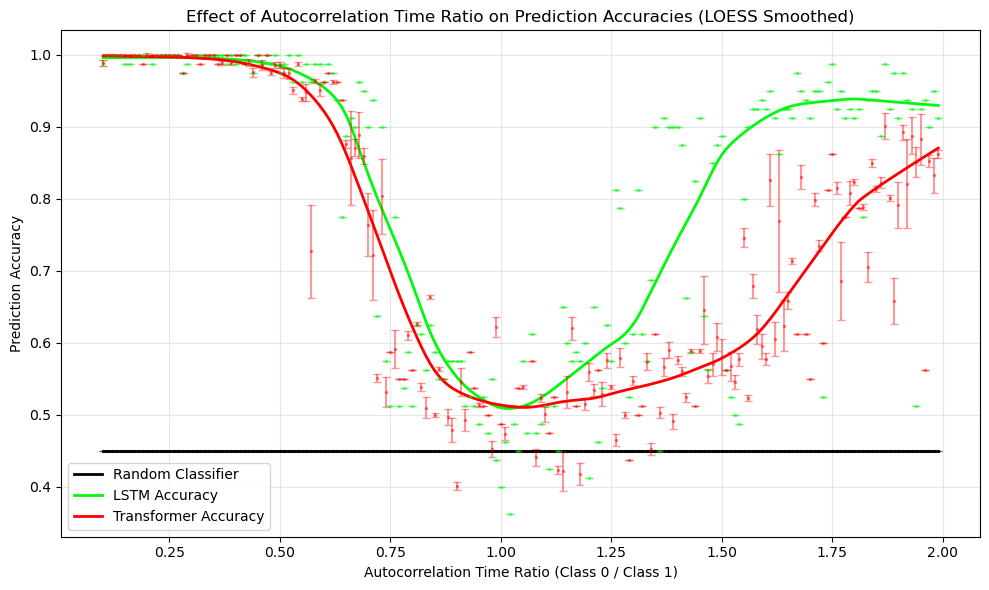

In [ ]:
# Plot the LOESS smoothed data with improved colors
plt.figure(figsize=(10, 6))
plt.errorbar(t_ac_ratios_recorded, random_accuracy.values, yerr=random_std.values, fmt='.', markersize=3, color=colors['random'], alpha=0.4, capsize=3)
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")

plt.errorbar(t_ac_ratios_recorded, iy001a_accuracy.values, yerr=iy001a_std.values, fmt='.', markersize=3, color=colors['iy001a'], alpha=0.4, capsize=3)
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="LSTM Accuracy")

plt.errorbar(t_ac_ratios_recorded, full_transformer_accuracy.values, yerr=full_transformer_std.values, fmt='.', markersize=3, color=colors['full_transformer'], alpha=0.4, capsize=3)
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Transformer Accuracy")

plt.xlabel("Autocorrelation Time Ratio (Class 0 / Class 1)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of Autocorrelation Time Ratio on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


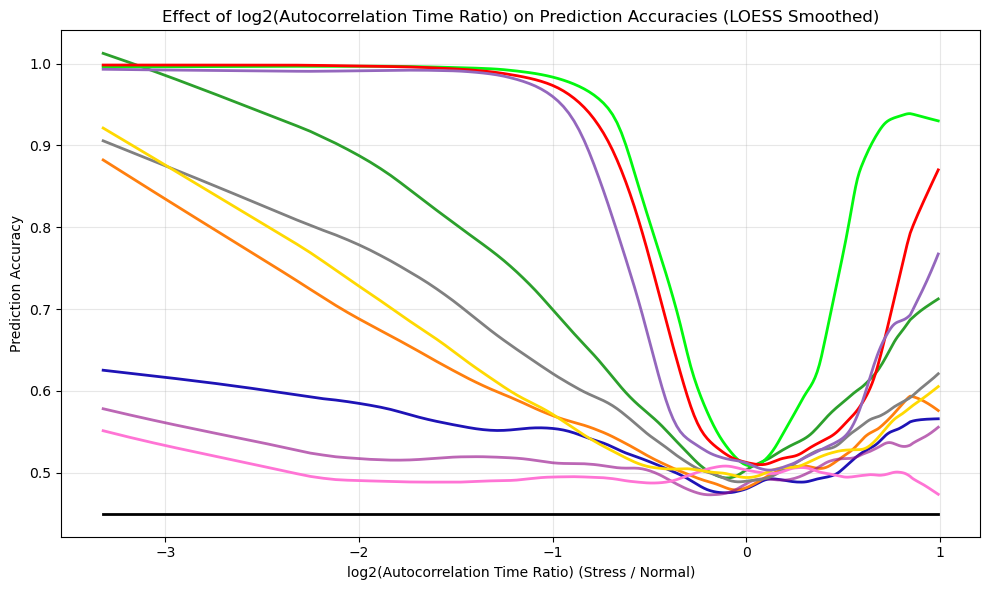

In [6]:

# Compute log2 of autocorrelation time ratios
log2_t_ac_ratios = np.log2(t_ac_ratios_recorded)
# re-compute the loess smoothed data with log2 T_ac ratios
linear_svm_loess = lowess(linear_svm_accuracy.values, log2_t_ac_ratios, frac=0.2)
rbf_svm_loess = lowess(rbf_svm_accuracy.values, log2_t_ac_ratios, frac=0.2)
rf_loess = lowess(rf_accuracy.values, log2_t_ac_ratios, frac=0.2)
log_reg_loess = lowess(log_reg_accuracy.values, log2_t_ac_ratios, frac=0.2)
mlp_loess = lowess(mlp_accuracy.values, log2_t_ac_ratios, frac=0.2)
random_loess = lowess(random_accuracy.values, log2_t_ac_ratios, frac=0.2)
lstm_loess = lowess(lstm_accuracy.values, log2_t_ac_ratios, frac=0.2)
iy001a_loess = lowess(iy001a_accuracy.values, log2_t_ac_ratios, frac=0.2)
vanilla_transformer_loess = lowess(vanilla_transformer_accuracy.values, log2_t_ac_ratios, frac=0.2)
full_transformer_loess = lowess(full_transformer_accuracy.values, log2_t_ac_ratios, frac=0.2)
iy006c_loess = lowess(iy006c_accuracy.values, log2_t_ac_ratios, frac=0.2)

# plot the x-asis as log2(t_ac ratio) - lowess smoothed
plt.figure(figsize=(10, 6))
plt.plot(linear_svm_loess[:, 0], linear_svm_loess[:, 1], linestyle='-', color=colors['linear_svm'], linewidth=2, label="SVM (linear) Accuracy")
plt.plot(rbf_svm_loess[:, 0], rbf_svm_loess[:, 1], linestyle='-', color=colors['rbf_svm'], linewidth=2, label="SVM (rbf) Accuracy")
plt.plot(rf_loess[:, 0], rf_loess[:, 1], linestyle='-', color=colors['random_forest'], linewidth=2, label="Random Forest Accuracy")
plt.plot(log_reg_loess[:, 0], log_reg_loess[:, 1], linestyle='-', color=colors['logistic_reg'], linewidth=2, label="Logistic Regression Accuracy")
plt.plot(mlp_loess[:, 0], mlp_loess[:, 1], linestyle='-', color=colors['mlp'], linewidth=2, label="MLP Accuracy")
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")
plt.plot(lstm_loess[:, 0], lstm_loess[:, 1], linestyle='-', color=colors['lstm'], linewidth=2, label="Vanilla LSTM Accuracy")
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="IY001A Accuracy")
plt.plot(vanilla_transformer_loess[:, 0], vanilla_transformer_loess[:, 1], linestyle='-', color=colors['vanilla_transformer'], linewidth=2, label="Vanilla Transformer Accuracy")
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Full Transformer Accuracy")
plt.plot(iy006c_loess[:, 0], iy006c_loess[:, 1], linestyle='-', color=colors['iy006c'], linewidth=2, label="IY006C Transformer Accuracy")
plt.xlabel("log2(Autocorrelation Time Ratio) (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of log2(Autocorrelation Time Ratio) on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/t_ac_ratio_vs_accuracy_loess_log2_better_colors.png", bbox_inches='tight')
plt.show()

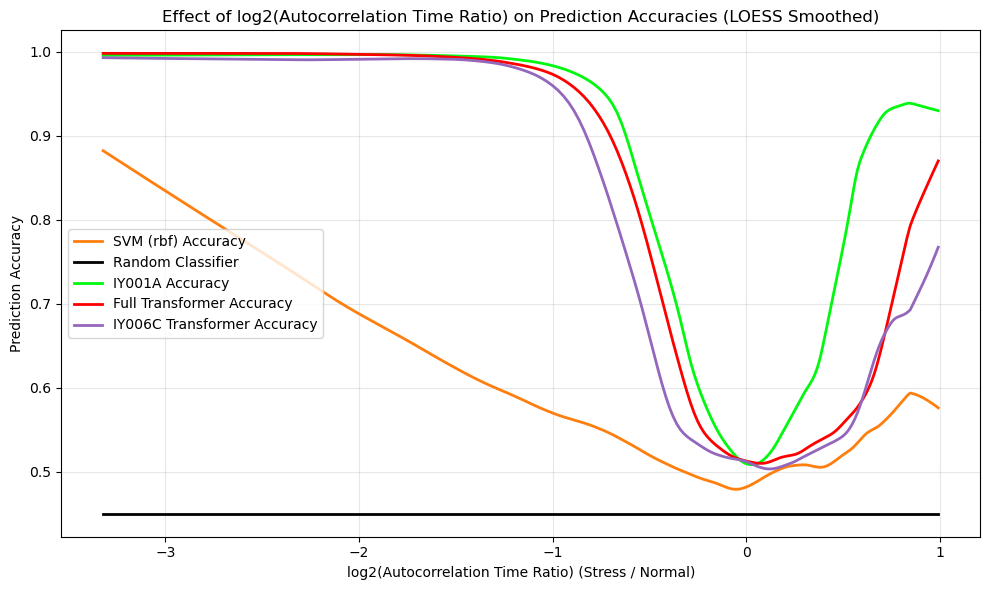

In [7]:
# Plot random classifier, SVM (rbf), and transformer accuracies for key comparison
# plot the x-axis as log2(t_ac ratio) - lowess smoothed
plt.figure(figsize=(10, 6))
plt.plot(rbf_svm_loess[:, 0], rbf_svm_loess[:, 1], linestyle='-', color=colors['rbf_svm'], linewidth=2, label="SVM (rbf) Accuracy")
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="IY001A Accuracy")
# plt.plot(vanilla_transformer_loess[:, 0], vanilla_transformer_loess[:, 1], linestyle='-', color=colors['vanilla_transformer'], linewidth=2, label="Vanilla Transformer Accuracy")
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Full Transformer Accuracy")
plt.plot(iy006c_loess[:, 0], iy006c_loess[:, 1], linestyle='-', color=colors['iy006c'], linewidth=2, label="IY006C Transformer Accuracy")
plt.xlabel("log2(Autocorrelation Time Ratio) (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of log2(Autocorrelation Time Ratio) on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/t_ac_ratio_vs_accuracy_loess_log2_selected.png", bbox_inches='tight')
plt.show()

In [8]:
# Additional analysis: Show autocorrelation time values used
print("Summary of the autocorrelation time experiment:")
print(f"Normal condition autocorrelation time (fixed): {df_IY007['Normal T_ac'].iloc[0]}")
print(f"Stress condition autocorrelation time range: {df_IY007['Stress T_ac'].min():.2f} - {df_IY007['Stress T_ac'].max():.2f}")
print(f"Autocorrelation time ratio range: {df_IY007['T_ac Ratio'].min():.2f} - {df_IY007['T_ac Ratio'].max():.2f}")
print(f"Number of different ratios tested: {len(t_ac_ratios_recorded)}")

# Show where classification becomes most difficult (closest to random)
random_baseline = 0.5
classifier_performance = rbf_svm_accuracy.copy()
min_performance_ratio = classifier_performance.idxmin()
min_performance_value = classifier_performance.min()

print(f"\nClassification difficulty analysis:")
print(f"Most difficult ratio (lowest SVM RBF accuracy): {min_performance_ratio:.2f}")
print(f"Accuracy at most difficult ratio: {min_performance_value:.3f}")
print(f"Distance from random baseline: {abs(min_performance_value - random_baseline):.3f}")

Summary of the autocorrelation time experiment:
Normal condition autocorrelation time (fixed): 50
Stress condition autocorrelation time range: 5.00 - 99.50
Autocorrelation time ratio range: 0.10 - 1.99
Number of different ratios tested: 190

Classification difficulty analysis:
Most difficult ratio (lowest SVM RBF accuracy): 1.00
Accuracy at most difficult ratio: 0.388
Distance from random baseline: 0.112


## Double check the Autocorrelation times of the simulated data

In [9]:
from stats.autocorrelation import calculate_autocorrelation, calculate_ac_time_interp1d

In [10]:
# directory where the data is stored
data_dir = glob.glob("/home/ianyang/stochastic_simulations/experiments/EXP-25-IY007/data_t_ac/mRNA_trajectories_tac*/steady_state_trajectories/")
# within each directory there are 10 csv files corresponding to 10 repeats
# compute the observed autocorrelation times for each t_ac ratio
df_results = pd.DataFrame()
for dir_path in tqdm(data_dir):
    # read in the csv files
    csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
    # normal t_ac is always 50.00
    normal_t_ac = 50.00
    # stress t_ac will be the float value before _50.00 in each csv_files
    # Extract unique stress_t_ac values from filenames
    stress_t_ac = list(set([float(f.split("_")[-4]) for f in csv_files]))[0]
    # stress_t_ac = stress_t_ac_values[0]  # Take the first (and should be only) unique value
    t_ac_ratio = stress_t_ac / normal_t_ac
    
    # for each csv file, compute the autocorrelation time, then average over the 10 repeats
    df_list = []
    for file in csv_files:
        df = pd.read_csv(file)
        autocorr_results = calculate_autocorrelation(df)
        # for both normal and stress conditions, compute the mean autocorrelation function across all genes
        ac_mean_normal = autocorr_results["normal_ac"].mean(axis=0)
        lags_normal = autocorr_results["normal_lags"]
        ac_time_observed_normal = calculate_ac_time_interp1d(ac_mean_normal, lags_normal)
        # stress
        ac_mean_stress = autocorr_results["stress_ac"].mean(axis=0)
        lags_stress = autocorr_results["stress_lags"]
        ac_time_observed_stress = calculate_ac_time_interp1d(ac_mean_stress, lags_stress)
        
        df_list.append(pd.DataFrame({
            "Normal T_ac": [normal_t_ac],
            "Stress T_ac": [stress_t_ac],
            "T_ac Ratio": [t_ac_ratio],
            "Observed Stress T_ac": [ac_time_observed_stress],
            "Observed Normal T_ac": [normal_t_ac],
            "Observed T_ac Ratio": [ac_time_observed_stress / normal_t_ac],
            "Relative Error % (Stress)": [abs(ac_time_observed_stress - stress_t_ac) * 100 / stress_t_ac],
            "Relative Error % (Normal)": [abs(ac_time_observed_normal - normal_t_ac) * 100 / normal_t_ac],
        }))
    df_results = pd.concat([df_results] + df_list, axis=0, ignore_index=True)
df_results

  0%|          | 0/190 [00:00<?, ?it/s]

100%|██████████| 190/190 [02:44<00:00,  1.16it/s]


,Normal T_ac,Stress T_ac,T_ac Ratio,Observed Stress T_ac,Observed Normal T_ac,Observed T_ac Ratio,Relative Error % (Stress),Relative Error % (Normal)
0,50.0,11.5,0.23,11.31667497739839,50.0,0.226333,1.594131,3.028307
1,50.0,11.5,0.23,11.31667497739839,50.0,0.226333,1.594131,3.028307
2,50.0,11.5,0.23,11.31667497739839,50.0,0.226333,1.594131,3.028307
3,50.0,11.5,0.23,11.31667497739839,50.0,0.226333,1.594131,3.028307
4,50.0,11.5,0.23,11.31667497739839,50.0,0.226333,1.594131,3.028307
...,...,...,...,...,...,...,...,...
1895,50.0,83.5,1.67,71.64310685832007,50.0,1.432862,14.199872,9.430931
1896,50.0,83.5,1.67,71.64310685832007,50.0,1.432862,14.199872,9.430931
1897,50.0,83.5,1.67,71.64310685832007,50.0,1.432862,14.199872,9.430931
1898,50.0,83.5,1.67,71.64310685832007,50.0,1.432862,14.199872,9.430931


In [11]:
# mean relative error for each t_ac ratio
df_summary = df_results.groupby("T_ac Ratio").agg({
    "Normal T_ac": "first",
    "Stress T_ac": "first",
    "Observed Normal T_ac": "mean",
    "Observed Stress T_ac": "mean",
    "Observed T_ac Ratio": "mean",
    "Relative Error % (Stress)": "mean",
    "Relative Error % (Normal)": "mean",
}).reset_index()
df_summary

,T_ac Ratio,Normal T_ac,Stress T_ac,Observed Normal T_ac,Observed Stress T_ac,Observed T_ac Ratio,Relative Error % (Stress),Relative Error % (Normal)
0,0.10,50.0,5.0,50.0,4.729815,0.094596,5.403708,3.139000
1,0.11,50.0,5.5,50.0,5.458988,0.109180,0.745668,3.028307
2,0.12,50.0,6.0,50.0,5.570005,0.111400,7.166576,3.028307
3,0.13,50.0,6.5,50.0,6.11828,0.122366,5.872621,3.028307
4,0.14,50.0,7.0,50.0,6.528284,0.130566,6.738794,3.028307
...,...,...,...,...,...,...,...,...
185,1.95,50.0,97.5,50.0,77.200756,1.544015,20.819737,20.624211
186,1.96,50.0,98.0,50.0,76.6928,1.533856,21.742040,13.913176
187,1.97,50.0,98.5,50.0,60.762577,1.215252,38.312105,25.515175
188,1.98,50.0,99.0,50.0,79.023577,1.580472,20.178205,2.863441


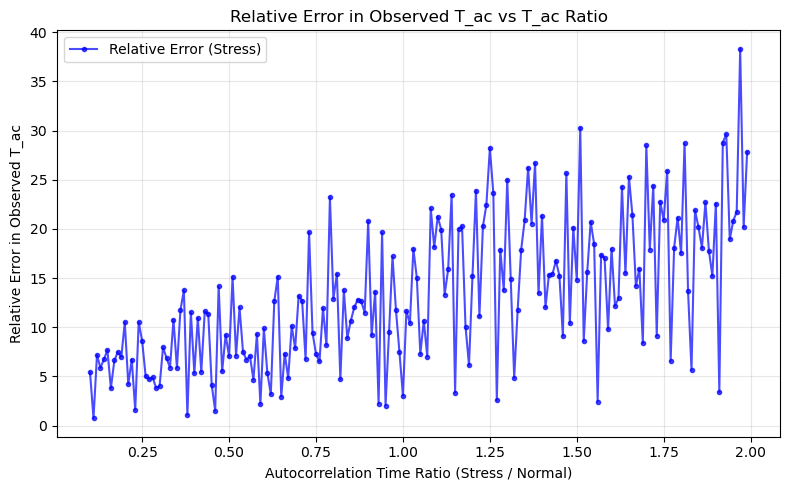

In [12]:
# plot the relative error (stress) vs t_ac ratio
plt.figure(figsize=(8, 5))
plt.plot(df_summary["T_ac Ratio"], df_summary["Relative Error % (Stress)"], marker='.', linestyle='-', color='blue', label="Relative Error (Stress)", alpha=0.7)
# plt.plot(df_summary["T_ac Ratio"], df_summary["Relative Error % (Normal)"], marker='.', linestyle='-', color='red', label="Relative Error (Normal)", alpha=0.7)
plt.xlabel("Autocorrelation Time Ratio (Stress / Normal)")
plt.ylabel("Relative Error in Observed T_ac")
plt.title("Relative Error in Observed T_ac vs T_ac Ratio")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/observed_t_ac_relative_error_vs_ratio.png", bbox_inches='tight')
plt.show()

The relative errors seem to increase with increasing t_ac, which is expected as the longer t_ac requires longer time series simulations to achieve the same level of accuracy, but we've taken a variable length approach to simulation time so this should help mitigate this.

Implementation: 
```python
    # Simulation parameters
    min_d = min(pset["d"] for pset in parameter_sets)
    steady_state_time = int(10 / min_d)
    time_points = np.arange(0, 144, 1)
    extended_time_points = np.arange(
        time_points[0],
        144 + steady_state_time,
        1,)
```

## Visualise a few time series when t_ac ratio is less than 1

In [13]:
# plot some time series when t_ac ratio is less than 1 to investigate why SVM is doing well in that region
sub_1_dir = glob.glob("/home/ianyang/stochastic_simulations/experiments/EXP-25-IY007/data_t_ac/mRNA_trajectories_tac*/")
# filter the directories for t_ac ratio < 1
filtered_dirs = [d for d in sub_1_dir if (float(d.split("_")[-2]) / 50.00) < 1.0]

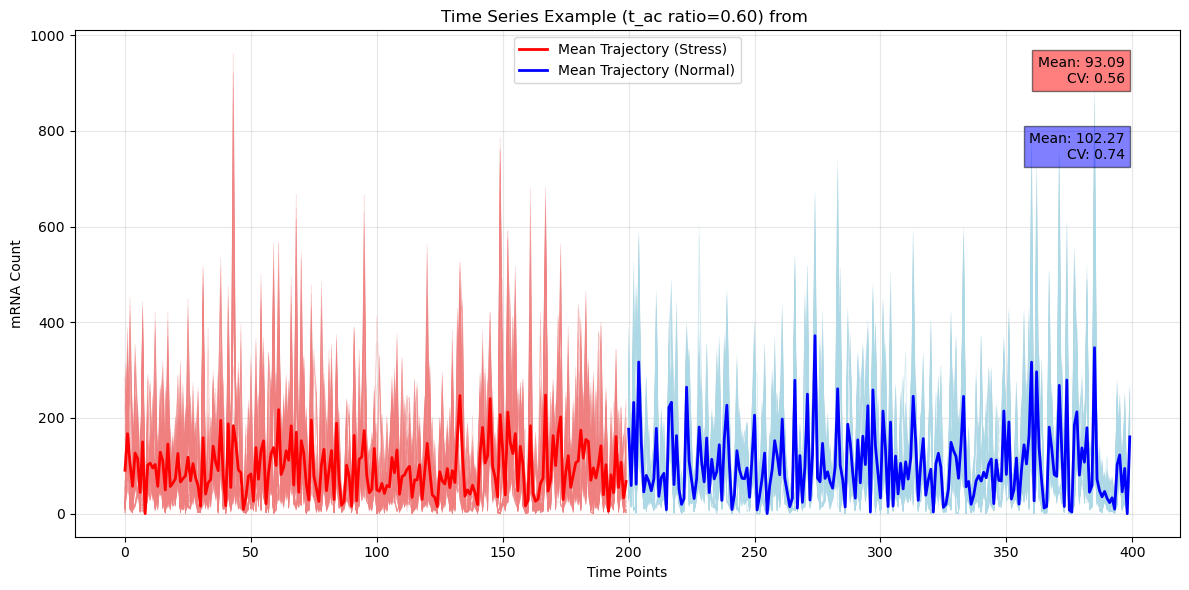

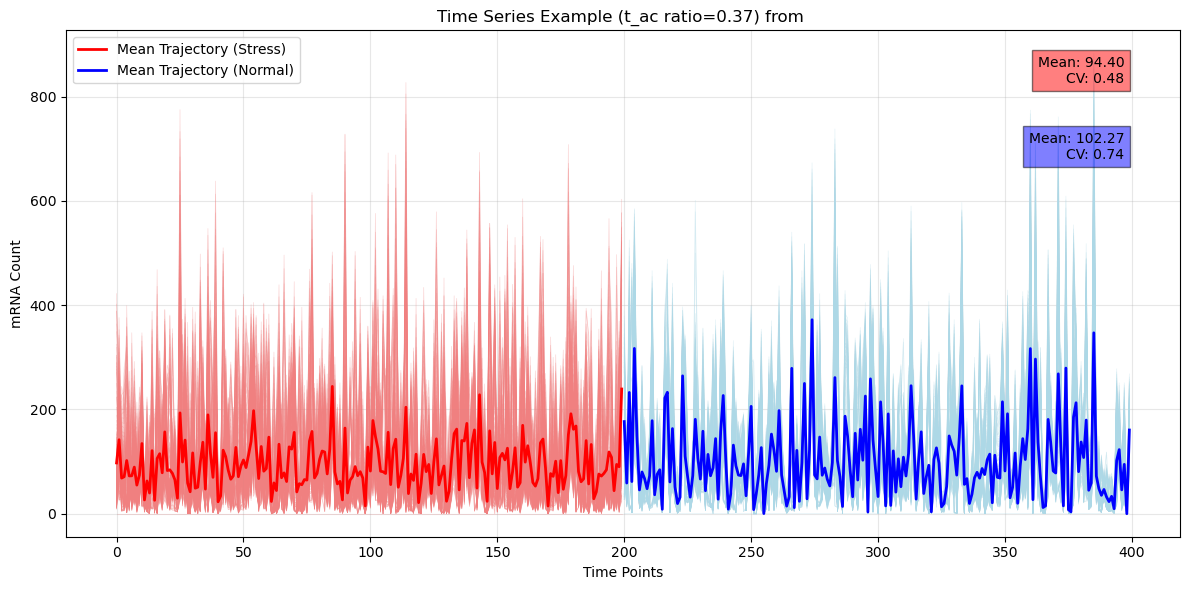

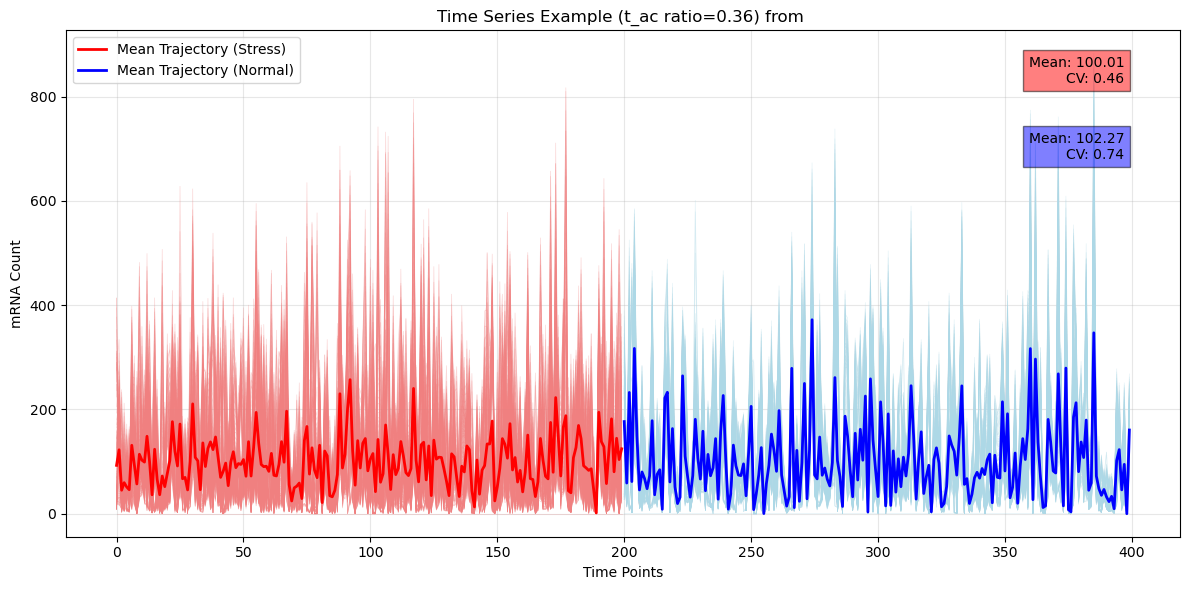

In [14]:
# get a few example directories to plot
example_dirs = np.random.choice(filtered_dirs, 3, replace=False)  # Take 3 random directories as examples

for dir_path in example_dirs:
    # we want just the steady_state subdirectory
    ss_dir_path = os.path.join(dir_path, "steady_state_trajectories")
    # read in the csv files
    csv_files = glob.glob(os.path.join(ss_dir_path, "*.csv")) # there should be 10 of these
    stress_t_ac = list(set([float(f.split("_")[-4]) for f in csv_files]))[0]
    t_ac_ratio = stress_t_ac / 50.00
    # Plot a few example time series from the first csv file in the directory
    example_file = csv_files[0]
    df = pd.read_csv(example_file)
    # get the stress only (label == 0)
    stress_df = df[df['label'] == 0]
    normal_df = df[df['label'] == 1]
    
    # Plot all trajectories in light gray with one highlighted in bold
    plt.figure(figsize=(12, 6))
    
    # Plot all trajectories with low opacity
    for i in range(stress_df.shape[1]):
        plt.plot(stress_df.index, stress_df.iloc[:, i], color='lightcoral', alpha=0.3, linewidth=0.5)
        
        plt.plot(normal_df.index, normal_df.iloc[:, i], color='lightblue', alpha=0.3, linewidth=0.5)
    
    # Highlight the mean of all trajectories in bold
    mean_trajectory_stress = stress_df.mean(axis=1)
    plt.plot(stress_df.index, mean_trajectory_stress, color='red', linewidth=2, label='Mean Trajectory (Stress)')
    # annotate with mean and cv 
    plt.text(0.95, 0.95, f'Mean: {mean_trajectory_stress.mean():.2f}\nCV: {mean_trajectory_stress.std() / mean_trajectory_stress.mean():.2f}', 
             horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='red', alpha=0.5))

    mean_trajectory_normal = normal_df.mean(axis=1)
    plt.plot(normal_df.index, mean_trajectory_normal, color='blue', linewidth=2, label='Mean Trajectory (Normal)')
    # annotate with mean and cv
    plt.text(0.95, 0.80, f'Mean: {mean_trajectory_normal.mean():.2f}\nCV: {mean_trajectory_normal.std() / mean_trajectory_normal.mean():.2f}', 
             horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='blue', alpha=0.5))

    plt.title(f'Time Series Example (t_ac ratio={t_ac_ratio:.2f}) from {os.path.basename(dir_path)}')
    plt.xlabel('Time Points')
    plt.ylabel('mRNA Count')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()